In [1]:
import os
os.chdir('../../')

In [2]:
import DeepPurpose.models as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [3]:
X_drug, X_target, y = load_process_DAVIS('./data/')

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


In [4]:
drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.


In [5]:
# model setup, you can adjust the config file by typing in model parameters. e.g. cls_hidden_dim = [256, 32]
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [32,32], 
                         train_epoch = 2, 
                         LR = 0.01, 
                         batch_size = 32,
                         cnn_drug_filters = [2,4,8],
                         cnn_target_filters = [2,4,8]
                        )
model = models.model_initialize(**config)

--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 28.042171
Training at Epoch 1 iteration 100 with loss 1.0610524
Training at Epoch 1 iteration 200 with loss 0.31322142
Training at Epoch 1 iteration 300 with loss 0.69326586
Training at Epoch 1 iteration 400 with loss 0.9384412
Training at Epoch 1 iteration 500 with loss 0.80056953
Training at Epoch 1 iteration 600 with loss 0.98188233
Validation at Epoch 1 , MSE: 0.6520593471201315 , Pearson Correlation: 0.4177241878816179 with p-value: 2.8554370757664493e-127 , Concordance Index: 0.7135995333769035
Training at Epoch 2 iteration 0 with loss 0.70281094
Training at Epoch 2 iteration 100 with loss 1.1751387
Training at Epoch 2 iteration 200 with loss 0.49461162
Training at Epoch 2 iteration 300 with loss 0.67964906
Training at Epoch 2 iteration 400 with loss 0.4696337
Training at Epoch 2 iteration 500 with loss 0.45558348
Training at Epoch 2 iteration 600 with loss 0.65621465
Validation at Epoch 2 

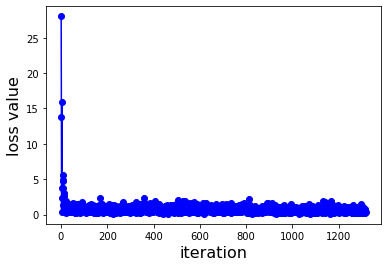

In [6]:
model.train(train, val, test)

In [3]:
#model.save_model('./model')
#model = models.model_pretrained('./model')

In [4]:
X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub('./data/')
target, target_name = load_SARS_CoV_Protease_3CL()

_ = models.repurpose(X_repurpose, target, 
                     model, drug_cid, target_name, 
                     convert_y = True)

repurposing...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.
predicting...
---------------
Drug Repurposing Result for SARS-CoV 3CL Protease
Drug 36689751.0   predicted to have binding affinity score 84.00
Drug 37147.0      predicted to have binding affinity score 84.00
Drug 4113.0       predicted to have binding affinity score 84.00
Drug 5576.0       predicted to have binding affinity score 84.00
Drug 5245.0       predicted to have binding affinity score 84.00
Drug 24699.0      predicted to have binding affinity score 84.00
Drug 550758.0     predicted to have binding affinity score 84.00
Drug 10468.0      predicted to have binding affinity score 84.00
Drug 8567.0       predicted to have binding affinity score 84.00
Drug 68374.0      predicted to have binding affinity score 84.00
Drug 1176.0       predicted to have binding affinity score